In [1]:
%pylab inline
from datascience import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Notes

- Changed all [he, she] into [he/ she]
- Changed all [itself, themselves] to [itself/ themselves]

In [2]:
Enmerkar_table = Table.read_table('Enmerkar.txt', sep = ',')
Enmerkar_table = Enmerkar_table.drop(['text_name', 'etcsl_no'])
Enmerkar_table

text_name,l_no,text
Enmerkar and En-suhgir-ana,1,sux:šeg₁₂[brick(work)]N sux:kur[(mountain) land]N sux:šu ...
Enmerkar and En-suhgir-ana,2,sux:Kulaba[1]SN sux:iri[town]N sux:an[heaven]N sux:ki[pl ...
Enmerkar and En-suhgir-ana,3,sux:Unug[1]SN sux:mu[name]N sux:tir-an-na[rainbow]N
Enmerkar and En-suhgir-ana,4,sux:an[heaven]N sux:us₂[to be adjacent]V sux:si-muš₃[bri ...
Enmerkar and En-suhgir-ana,5,sux:an[heaven]N sux:gub[to stand]V sux:ud-sakar[crescent ...
Enmerkar and En-suhgir-ana,6,sux:me[essence]N sux:gal[to be big]V sux:nam-nun[princel ...
Enmerkar and En-suhgir-ana,7,sux:kur[(mountain) land]N sux:sikil[to be pure]V sux:ud[ ...
Enmerkar and En-suhgir-ana,8,sux:itid[moon(light)]N sux:kalam[the Land]N sux:e₃[to go ...
Enmerkar and En-suhgir-ana,9,sux:ud[day(light)]N sux:zalag[to be shining]V sux:kalam[ ...
Enmerkar and En-suhgir-ana,10,sux:ab₂-ur₃[rear cow]N sux:ab₂-saharₓ[type of cow]N sux: ...


In [3]:
def remove_space_from_labels(table):
    for label in table.labels:
        table.relabel(label, label.replace(' ', ''))
    return table

Enmerkar_table = remove_space_from_labels(Enmerkar_table)

In [4]:
#drop rows of different translations
to_be_dropped = []
for i in Enmerkar_table['l_no']:
    if re.search('[a-zA-Z]', i):
        to_be_dropped.append(False)
    else:
        to_be_dropped.append(True)
Enmerkar_table = Enmerkar_table.where(to_be_dropped)

Enmerkar_table.labels

('text_name', 'l_no', 'text')

In [5]:
proper_nouns = {
'CN': 'Constellation Name (star)',
'DN': 'Deity Name',
'EN': 'Ethnicity Name',
'FN': 'Field Name',
'GN': 'Geographical Name (for regions and countries)',
'MN': 'Month Name',
'ON': 'Object Name (usually for objects associated with a god)',
'PN': 'Personal Name',
'RN': 'Royal Name',
'SN': 'Settlement Name',
'TN': 'Temple Name',
'WN': 'Water Name',
}

simple_terms = {
    'AJ': 'Adjective',
    'AV': 'Adverb',
    'C': 'Conjunction',
    'N': 'Noun',
    'NU': 'Number',
    'PD': 'Part of Speech',
    'V': 'Verb',
}

In [6]:
def term_finder (line):
    #returns the meanings of words in a line of text
    terms = re.findall(r"(?<=\[)(.*?)(?=\])", line)
    return terms

def proper_noun_finder(line):
    #returns a list of all the proper nouns in a line of text
    nouns = re.findall(r"(?<=\:)(.*?)(?=\[)", line)
    nouns = [word for word in nouns if (len(word) > 1 and word[0].isupper() and not word[1].isupper())]
    return nouns

def speech_article_finder(line, proper_noun_filter = True):
    #returns the speech articles for proper_nouns or all words
    terms = re.findall(r"(?<=\])(.*?)(?=\s)", line)
    if proper_noun_filter:
        articles = [term for term in terms if term in proper_nouns]
    else: 
        articles = terms
    return articles


In [7]:
Enmerkar_table = Enmerkar_table.with_columns([
    'terms', Enmerkar_table.apply(term_finder, 'text'), 
    'proper_nouns', Enmerkar_table.apply(proper_noun_finder, 'text'), 
    'speech_articles', Enmerkar_table.apply(speech_article_finder, 'text')
    ])

Enmerkar_table.show()

text_name,l_no,text,terms,proper_nouns,speech_articles
Enmerkar and En-suhgir-ana,1,sux:šeg₁₂[brick(work)]N sux:kur[(mountain) land]N sux:šu ...,"['brick(work)', '(mountain) land', 'shining', 'to go out ...",[],[]
Enmerkar and En-suhgir-ana,2,sux:Kulaba[1]SN sux:iri[town]N sux:an[heaven]N sux:ki[pl ...,"['1', 'town', 'heaven', 'place', 'to grow']",['Kulaba'],['SN']
Enmerkar and En-suhgir-ana,3,sux:Unug[1]SN sux:mu[name]N sux:tir-an-na[rainbow]N,"['1', 'name', 'rainbow']",['Unug'],['SN']
Enmerkar and En-suhgir-ana,4,sux:an[heaven]N sux:us₂[to be adjacent]V sux:si-muš₃[bri ...,"['heaven', 'to be adjacent', 'brilliance', 'to be multic ...",[],[]
Enmerkar and En-suhgir-ana,5,sux:an[heaven]N sux:gub[to stand]V sux:ud-sakar[crescent ...,"['heaven', 'to stand', 'crescent (moon)', 'to be new', ' ...",[],[]
Enmerkar and En-suhgir-ana,6,sux:me[essence]N sux:gal[to be big]V sux:nam-nun[princel ...,"['essence', 'to be big', 'princeliness', 'to erect']",[],[]
Enmerkar and En-suhgir-ana,7,sux:kur[(mountain) land]N sux:sikil[to be pure]V sux:ud[ ...,"['(mountain) land', 'to be pure', 'day(light)', 'to be g ...",[],[]
Enmerkar and En-suhgir-ana,8,sux:itid[moon(light)]N sux:kalam[the Land]N sux:e₃[to go ...,"['moon(light)', 'the Land', 'to go out or in']",[],[]
Enmerkar and En-suhgir-ana,9,sux:ud[day(light)]N sux:zalag[to be shining]V sux:kalam[ ...,"['day(light)', 'to be shining', 'the Land', 'horn', 'to ...",[],[]
Enmerkar and En-suhgir-ana,10,sux:ab₂-ur₃[rear cow]N sux:ab₂-saharₓ[type of cow]N sux: ...,"['rear cow', 'type of cow', 'abundance', 'to go out or in']",[],[]


In [8]:
def partitioning(line_no):
    
    ln = int(''.join(c for c in line_no if c.isdigit()))

    if(ln <= 13):
        return "1.1"
    elif (ln <= 21):
        return "1.2"
    
    elif (ln <= 39):
        return "2.1.1"
    elif (ln <= 51):
        return "2.1.2"
    elif (ln <= 69):
        return "2.1.3"
    
    elif (ln <= 76):
        return "2.2.1"
    elif (ln <= 90):
        return "2.2.2"
    elif (ln <= 113):
        return "2.2.3"
    
    elif (ln <= 127):
        return "2.3.1"
    elif (ln <= 132):
        return "2.3.2"
    elif (ln <= 134):
        return "2.3.3"
    
    elif (ln <= 138):
        return "3.1.1"
    elif (ln <= 149):
        return "3.1.2"
    elif (ln <= 162):
        return "3.1.3"
    elif (ln <= 169):
        return "3.1.4"
    
    elif (ln <= 184):
        return "3.2.1"
    elif (ln <= 197):
        return "3.2.2"
    elif (ln <= 205):
        return "3.2.3"
    elif (ln <= 210):
        return "3.2.4"
    elif (ln <= 221):
        return "3.2.5"
    
    elif (ln <= 227):
        return "4.1"
    
    elif (ln <= 248):
        return "4.2.1"
    elif (ln <= 254):
        return "4.2.2"
    elif (ln <= 263):
        return "4.2.3"
    elif (ln <= 273):
        return "4.2.4"
    
    elif (ln <= 280):
        return "5.1"
    elif (ln <= 283):
        return "5.2"
    elif (ln <= 310):
        return "B"
    return "0"

def small_partition(line_no):
    ln = int(''.join(c for c in line_no if c.isdigit()))
    if(ln <= 13):
        return "1.1"
    elif (ln <= 21):
        return "1.2"
    elif (ln <= 69):
        return "2.1"
    elif (ln <= 113):
        return "2.2"
    elif (ln <= 134):
        return "2.3"
    elif (ln <= 169):
        return "3.1"
    elif (ln <= 221):
        return "3.2"
    elif (ln <= 227):
        return "4.1"
    elif (ln <= 273):
        return "4.2"
    elif (ln <= 280):
        return "5.1"
    elif (ln <= 283):
        return "5.2"
    elif (ln <= 310):
        return "6"
    return "0"

In [9]:
Enmerkar_table.append_column('section', Enmerkar_table.apply(partitioning, 'l_no'))
Enmerkar_graph = Enmerkar_table.select(['proper_nouns', 'speech_articles', 'section']).group('section', list)
Enmerkar_graph

section,proper_nouns list,speech_articles list
1.1,"[[], ['Kulaba'], ['Unug'], [], [], [], [], [], [], [], [ ...","[[], ['SN'], ['SN'], [], [], [], [], [], [], [], ['SN'], ..."
1.2,"[['Utu'], ['Aratta', 'Ansiga-ria'], ['Enmerkar', 'Kulaba ...","[['DN'], ['SN', 'PN'], ['RN', 'SN', 'PN'], [], [], [], [ ..."
2.1.1,"[['Unug', 'Kulaba'], ['Aratta', 'En-suhgir-ana'], ['Unug ...","[['SN', 'SN'], ['SN'], ['SN'], [], [], ['DN'], ['DN', 'T ..."
2.1.2,"[[], [], [], [], [], ['Šakkan'], [], [], [], [], [], []]","[[], [], [], [], [], ['DN'], [], [], [], [], [], []]"
2.1.3,"[[], [], ['Aratta', 'En-suhgir-ana'], [], [], [], ['Inan ...","[[], [], ['SN', 'RN'], [], [], [], ['DN'], ['DN', 'TN', ..."
2.2.1,"[['Unug'], [], [], [], ['Aratta'], ['Aratta'], []]","[['SN'], [], [], [], ['SN'], ['SN'], []]"
2.2.2,"[[], ['Inana', 'E-zagin', 'Aratta'], [], [], ['Inana'], ...","[[], ['DN', 'TN', 'SN'], [], [], ['DN'], [], [], [], [], ..."
2.2.3,"[['Enlil'], ['Ninurta', 'Enlil'], [], ['Aruru', 'Enlil'] ...","[['DN'], ['DN'], [], ['DN'], [], [], ['DN'], [], [], [], ..."
2.3.1,"[['Enmerkar', 'En-suhgir-ana'], [], [], ['En-suhgir-ana' ...","[['RN'], [], [], ['RN'], [], [], [], ['SN', 'SN'], [], [ ..."
2.3.2,"[[], ['Unug'], ['Enmerkar'], ['Enmerkar'], []]","[[], ['SN'], ['RN'], ['RN'], []]"


In [10]:
def list_flattening(pn_list):
    return [noun for nouns in pn_list for noun in nouns]

Enmerkar_graph.append_column('speech articles', Enmerkar_graph.apply(list_flattening, 'speech_articles list'))
Enmerkar_graph.append_column('proper nouns', Enmerkar_graph.apply(list_flattening, 'proper_nouns list'))
Enmerkar_graph = Enmerkar_graph.drop(['proper_nouns list', 'speech_articles list'])
Enmerkar_graph

section,speech articles,proper nouns
1.1,"['SN', 'SN', 'SN', 'SN']","['Kulaba', 'Unug', 'Unug', 'Aratta']"
1.2,"['DN', 'SN', 'PN', 'RN', 'SN', 'PN']","['Utu', 'Aratta', 'Ansiga-ria', 'Enmerkar', 'Kulaba', 'N ..."
2.1.1,"['SN', 'SN', 'SN', 'SN', 'DN', 'DN', 'TN', 'SN', 'DN', ' ...","['Unug', 'Kulaba', 'Aratta', 'En-suhgir-ana', 'Unug', 'I ..."
2.1.2,['DN'],['Šakkan']
2.1.3,"['SN', 'RN', 'DN', 'DN', 'TN', 'SN', 'DN', 'DN']","['Aratta', 'En-suhgir-ana', 'Inana', 'Inana', 'E-zagin', ..."
2.2.1,"['SN', 'SN', 'SN']","['Unug', 'Aratta', 'Aratta']"
2.2.2,"['DN', 'TN', 'SN', 'DN', 'DN', 'DN']","['Inana', 'E-zagin', 'Aratta', 'Inana', 'Inana', 'Utu']"
2.2.3,"['DN', 'DN', 'DN', 'DN', 'DN', 'SN', 'SN', 'SN', 'SN', ' ...","['Enlil', 'Ninurta', 'Enlil', 'Aruru', 'Enlil', 'Anzud', ..."
2.3.1,"['RN', 'RN', 'SN', 'SN', 'SN', 'SN', 'SN']","['Enmerkar', 'En-suhgir-ana', 'En-suhgir-ana', 'Unug', ' ..."
2.3.2,"['SN', 'RN', 'RN']","['Unug', 'Enmerkar', 'Enmerkar']"


In [11]:
def partitioner (i):
    rows = []
    section = Enmerkar_graph['section'][i]
    speech_articles = Enmerkar_graph['speech articles'][i]
    proper_nouns = Enmerkar_graph['proper nouns'][i]
    for j in range(len(speech_articles)):
        article = speech_articles[j]
        proper_noun = proper_nouns[j]
        rows.append([section, article, proper_noun])
    return rows

Enmerkar_table_section = Table(['section', 'speech articles', 'proper nouns'])
for i in range(Enmerkar_graph.num_rows):
    Enmerkar_table_section = Enmerkar_table_section.with_rows(partitioner(i))
Enmerkar_table_section

section,speech articles,proper nouns
1.1,SN,Kulaba
1.1,SN,Unug
1.1,SN,Unug
1.1,SN,Aratta
1.2,DN,Utu
1.2,SN,Aratta
1.2,PN,Ansiga-ria
1.2,RN,Enmerkar
1.2,SN,Kulaba
1.2,PN,Namena-tuma


In [25]:
proper_noun_by_section = Enmerkar_table_section.pivot('proper nouns', rows = 'section')
name_counts = []
for name in proper_noun_by_section.drop('section').labels:
    name_counts.append([name, np.sum(proper_noun_by_section[name])])

top_7_names = ['Aratta', 'En-suhgir-ana', 'Enmerkar', 'Inana', 'Nisaba', 'Saŋburu', 'Unug']

Enmerkar_table_section.group('proper nouns').sort('count', descending=True).column('proper nouns')[:7]

array(['Unug', 'Aratta', 'Inana', 'Nisaba', 'Saŋburu', 'Enmerkar',
       'En-suhgir-ana'], 
      dtype='<U13')

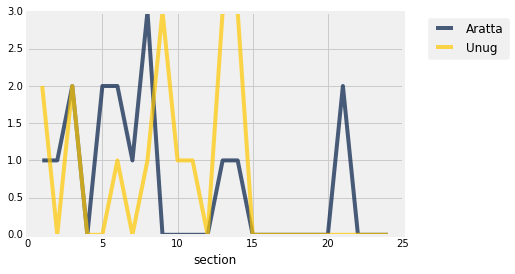

In [13]:
names_section_graph = proper_noun_by_section.with_column(
    'section', range(1, proper_noun_by_section.num_rows+1))

aratta_unug_section_graph = names_section_graph.select(['Aratta', 'Unug', 'section']).plot('section')
#notice Aratta is the only one mentioned in the section 4.2.3

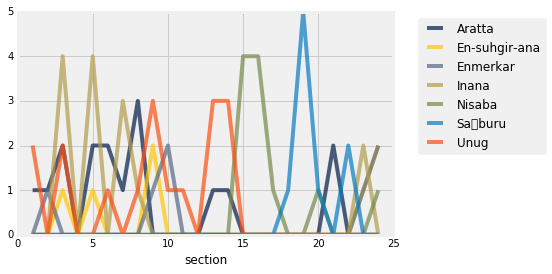

In [14]:
top_7_names_graph = names_section_graph.select(top_7_names + ['section']).plot('section')

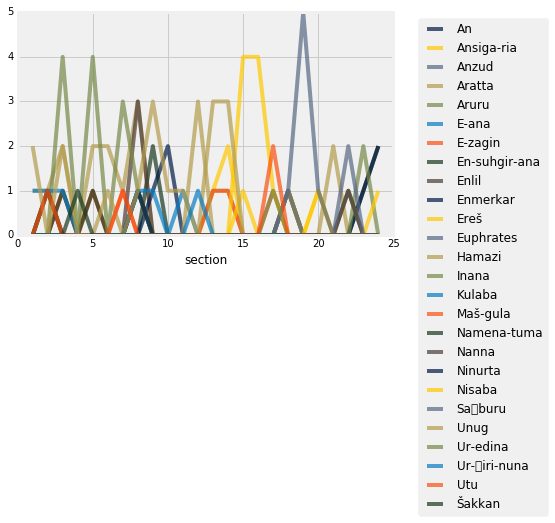

In [15]:
names_section_graph.plot('section')

### Plot character arcs by line number

In [16]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [17]:
def noun_counts(noun, proper_nouns):
    noun_count = []
    for i in np.arange(len(proper_nouns)):
        noun_count.append(proper_nouns[i].count(noun))
    return noun_count

In [18]:
names_cumulative_graph = Enmerkar_table.select(['l_no', 'proper_nouns'])
unique_nouns = np.sort(list(set(list_flattening(names_cumulative_graph.column('proper_nouns')))))
for i in np.arange(1, len(unique_nouns)+1):
    current_noun = unique_nouns[i-1]
    names_cumulative_graph.append_column(current_noun, np.cumsum(noun_counts(current_noun, names_cumulative_graph.column('proper_nouns'))))

names_cumulative_graph = names_cumulative_graph.drop('proper_nouns')

In [19]:
def plot(name, graph, prefix):
    if name != 'None':
        line_graph = graph.select([prefix] + [name])
        plt.plot(line_graph[0], line_graph[1])
        
def plot_cumulative_characters(name1, name2, name3, name4):
        plot(name1, names_cumulative_graph, 'l_no')
        plot(name2, names_cumulative_graph, 'l_no')
        plot(name3, names_cumulative_graph, 'l_no')
        plot(name4, names_cumulative_graph, 'l_no')
        
def plot_section_characters(name1, name2, name3, name4):
        plot(name1, names_section_graph, 'section')
        plot(name2, names_section_graph, 'section')
        plot(name3, names_section_graph, 'section')
        plot(name4, names_section_graph, 'section')
    
unique_nouns = tuple(['None'] + list(unique_nouns))

In [26]:
interact(plot_cumulative_characters, name1=unique_nouns, name2=unique_nouns, name3=unique_nouns, name4=unique_nouns)

<function __main__.plot_cumulative_characters>

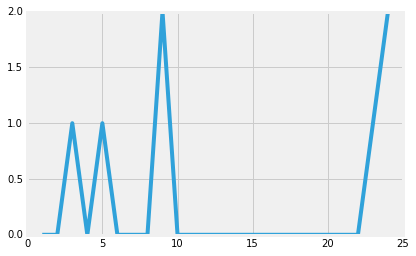

In [21]:
interact(plot_section_characters, name1=unique_nouns, name2=unique_nouns, name3=unique_nouns, name4=unique_nouns)

def plot(name, graph, prefix):
    if name != 'None':
        line_graph = graph.select([prefix] + [name])
        plt.plot(line_graph[0], line_graph[1])
        
def plot_cumulative_characters(name1, name2, name3, name4):
        plot(name1, names_cumulative_graph, 'l_no')
        plot(name2, names_cumulative_graph, 'l_no')
        plot(name3, names_cumulative_graph, 'l_no')
        plot(name4, names_cumulative_graph, 'l_no')
        
def plot_section_characters(name1, name2, name3, name4):
        plot(name1, names_section_graph, 'section')
        plot(name2, names_section_graph, 'section')
        plot(name3, names_section_graph, 'section')
        plot(name4, names_section_graph, 'section')
    
unique_nouns = tuple(['None'] + list(unique_nouns))

def plot(name, graph, prefix):
    if name != 'None':
        line_graph = graph.select([prefix] + [name])
        plt.plot(line_graph[0], line_graph[1])
        
def plot_cumulative_characters(name1, name2, name3, name4):
        plot(name1, names_cumulative_graph, 'l_no')
        plot(name2, names_cumulative_graph, 'l_no')
        plot(name3, names_cumulative_graph, 'l_no')
        plot(name4, names_cumulative_graph, 'l_no')
        
def plot_section_characters(name1, name2, name3, name4):
        plot(name1, names_section_graph, 'section')
        plot(name2, names_section_graph, 'section')
        plot(name3, names_section_graph, 'section')
        plot(name4, names_section_graph, 'section')
    
unique_nouns = tuple(['None'] + list(unique_nouns))